/Users/shayan/Desktop/IDS2/Stattkueche/venv_arm/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PART 1: Loading and preparing data...
Successfully loaded df_weather2.csv.

>>> TESTING MODE ENABLED: Sampling 100000 records from the original 4966796.
New DataFrame shape for testing: (100000, 41)
Initial DataFrame shape: (100000, 41)

PART 1 Complete: All necessary libraries and custom classes are defined.

PART 2: Aggregating data to daily level...
Daily aggregation finished in 0.03 seconds.
Daily aggregated DataFrame shape: (2421, 15)

PART 2 Complete: Daily data is ready.

PART 3: Defining feature engineering pipelines...

PART 3 Complete: Feature engineering pipelines are ready.

PART 4: Defining custom metric and hyperparameter grids...
>>> TESTING MODE: Using a smaller hyperparameter grid and fewer iterations.

PART 4 Complete: Custom metric and parameter grids are defined.

PART 5: Creating advanced calendar features (Optimized Method)...
Successfully loaded 44 holidays for NRW, Germany.
Advanced calendar features created.

PART 5 Complete: Final modeling dataframe is ready.


Python(82456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(82457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(82458) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(82459) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(82460) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(82461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(82462) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(82463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(82464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(82465) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(82466) Malloc

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4090
[LightGBM] [Info] Number of data points in the train set: 2421, number of used features: 37
[LightGBM] [Info] Start training from score 0.007518
Global cancellation model tuned in 6.63 seconds. Best RMSE: 0.0328

PART 6 Complete: Global cancellation rate model is trained.

PART 7: Training GLOBAL Stage 2 model to predict order quantity...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/var/folders/_4/yzd4h3k95051tj7kpg425rk80000gn/T/ipykernel_82449/893848238.py:166: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/var/folders/_4/yzd4h3k95051tj7kpg425rk80000gn/T/ipykernel_82449/893848238.py:166: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/var/folders/_4/yzd4h3k95051tj7kpg425rk80000gn/T/ipykernel_82449/893848238.py:166: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/var/folders/_4/yzd4h3k95051tj7kpg425rk8000

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3095
[LightGBM] [Info] Number of data points in the train set: 2421, number of used features: 29
[LightGBM] [Info] Start training from score 41.912433
Global order quantity model tuned in 6.16 seconds. Best RMSE: 14.5224

PART 7 Complete: Global order quantity model is trained.

PART 8: Evaluating global models and performing final analysis...

============================== Final Evaluation for Site: BK ==============================

--> Prediction Performance for Site: BK
    Final RMSE: 7.1465
    Final Asymmetric Loss: 5.8411


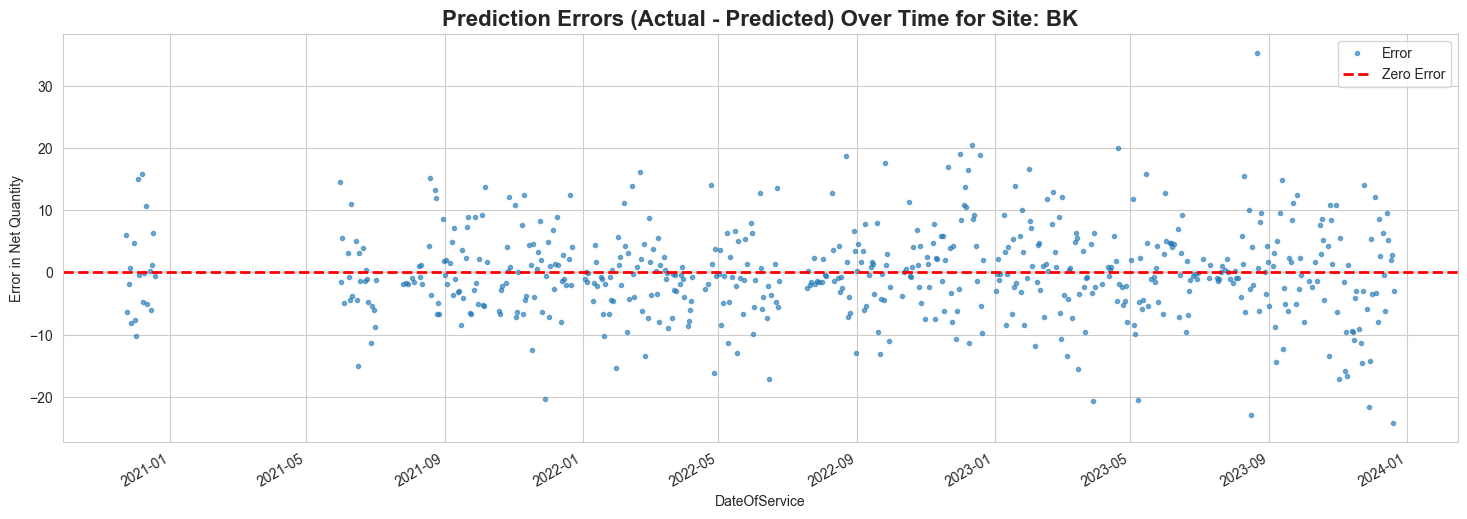


============================== Final Evaluation for Site: LP ==============================

--> Prediction Performance for Site: LP
    Final RMSE: 8.6000
    Final Asymmetric Loss: 6.0191


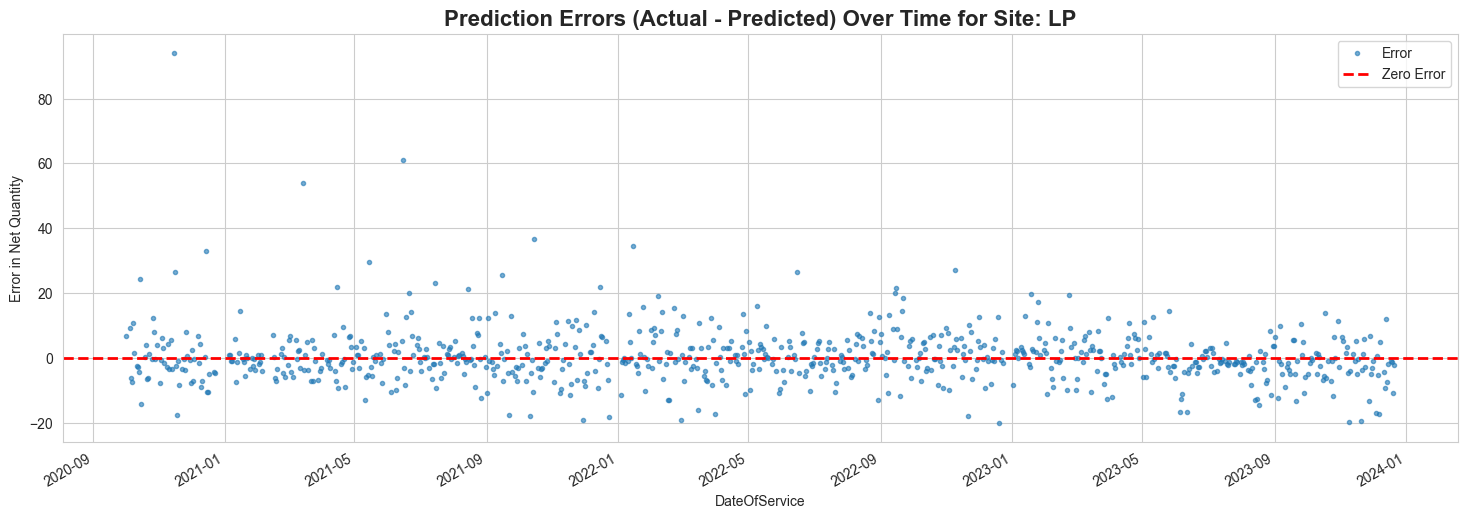


============================== Final Evaluation for Site: MS ==============================

--> Prediction Performance for Site: MS
    Final RMSE: 3.1157
    Final Asymmetric Loss: 2.5904


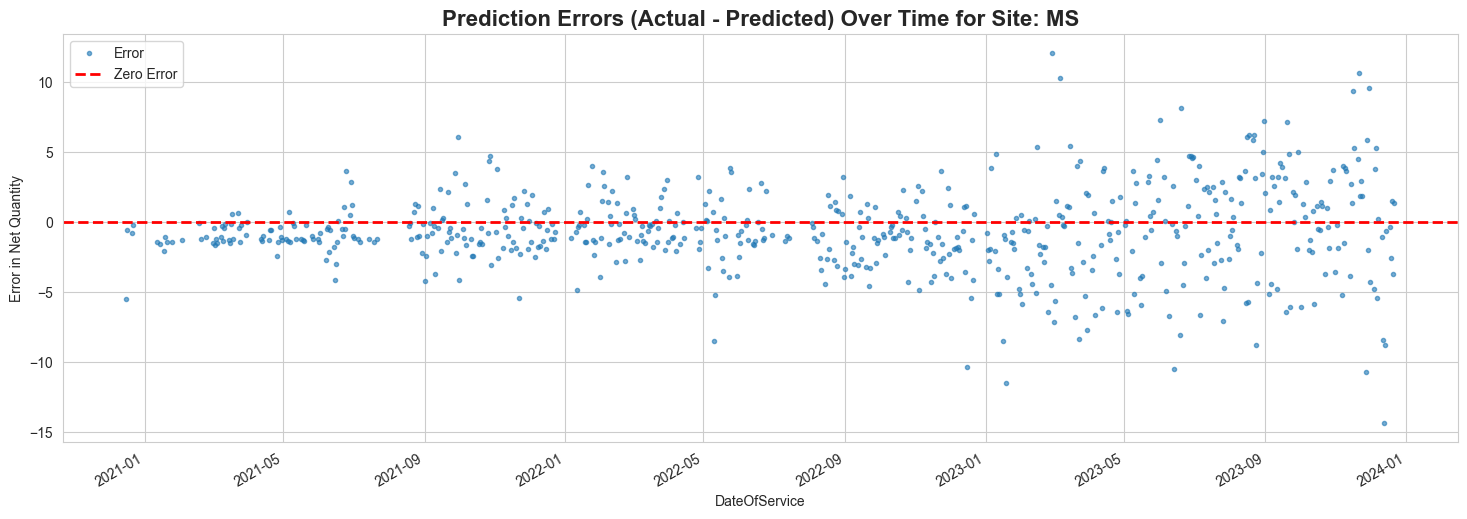



============================== OVERALL PERFORMANCE SUMMARY ==============================
Final Model Performance Across All Sites:


,Final Two-Stage LGBM Asymmetric Loss,Final Two-Stage LGBM RMSE
BK,5.841134,7.146515
LP,6.019125,8.599995
MS,2.590428,3.115716



SCRIPT COMPLETE: Final global two-stage model has been evaluated and analyzed.


============================== PART 9: MODEL DIAGNOSTICS ==============================

--- 1. Feature Importance Analysis ---


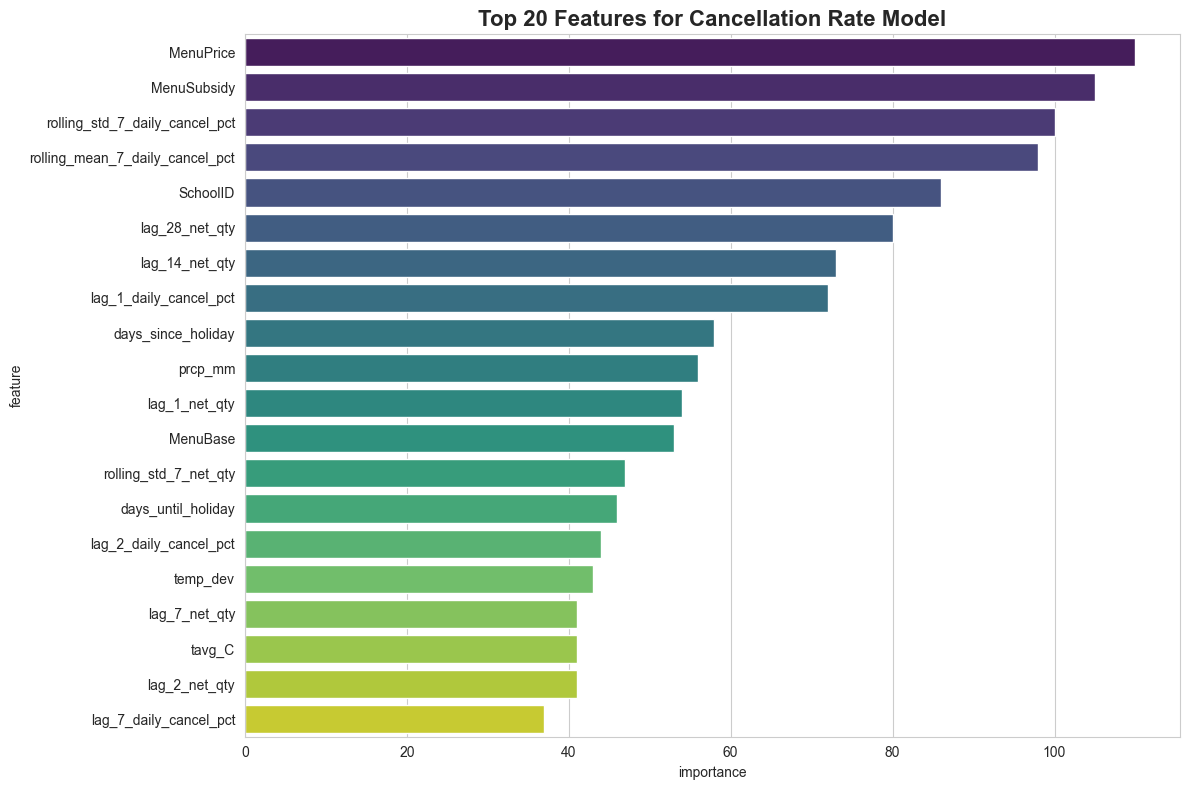

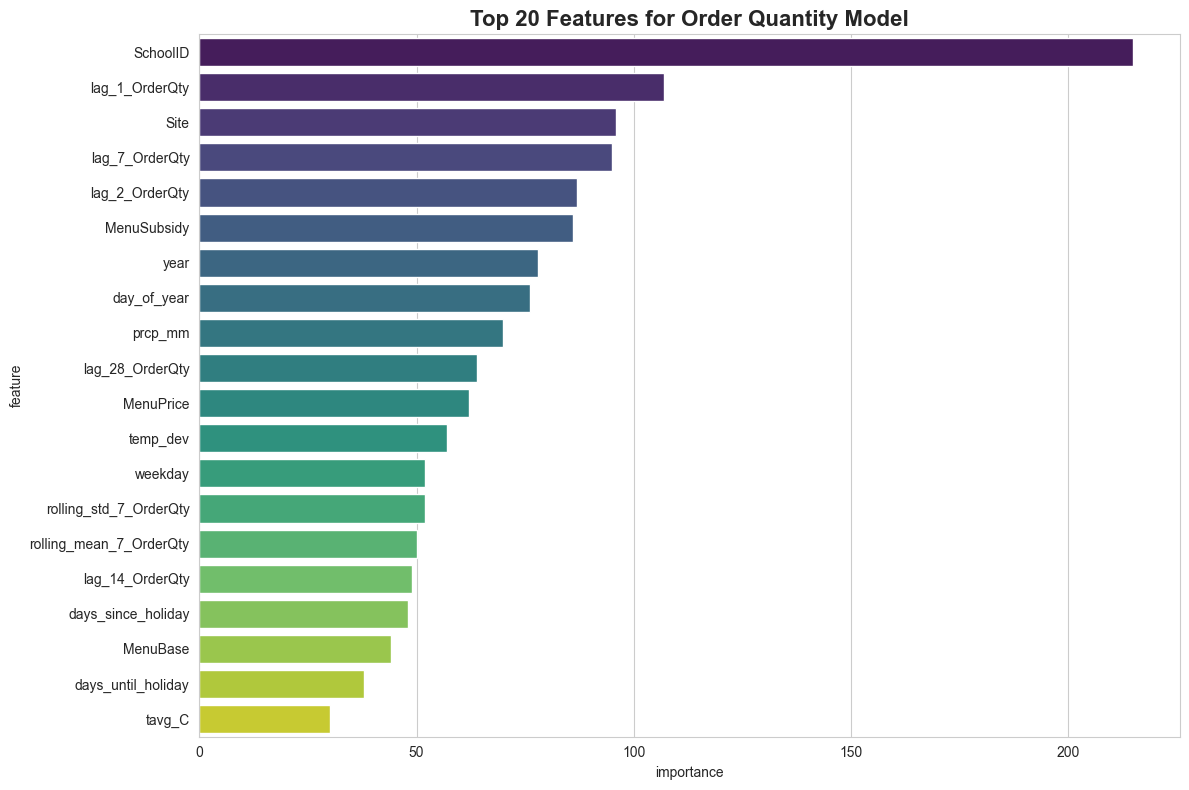


--- 2. Correlation Matrix of Numerical Features ---


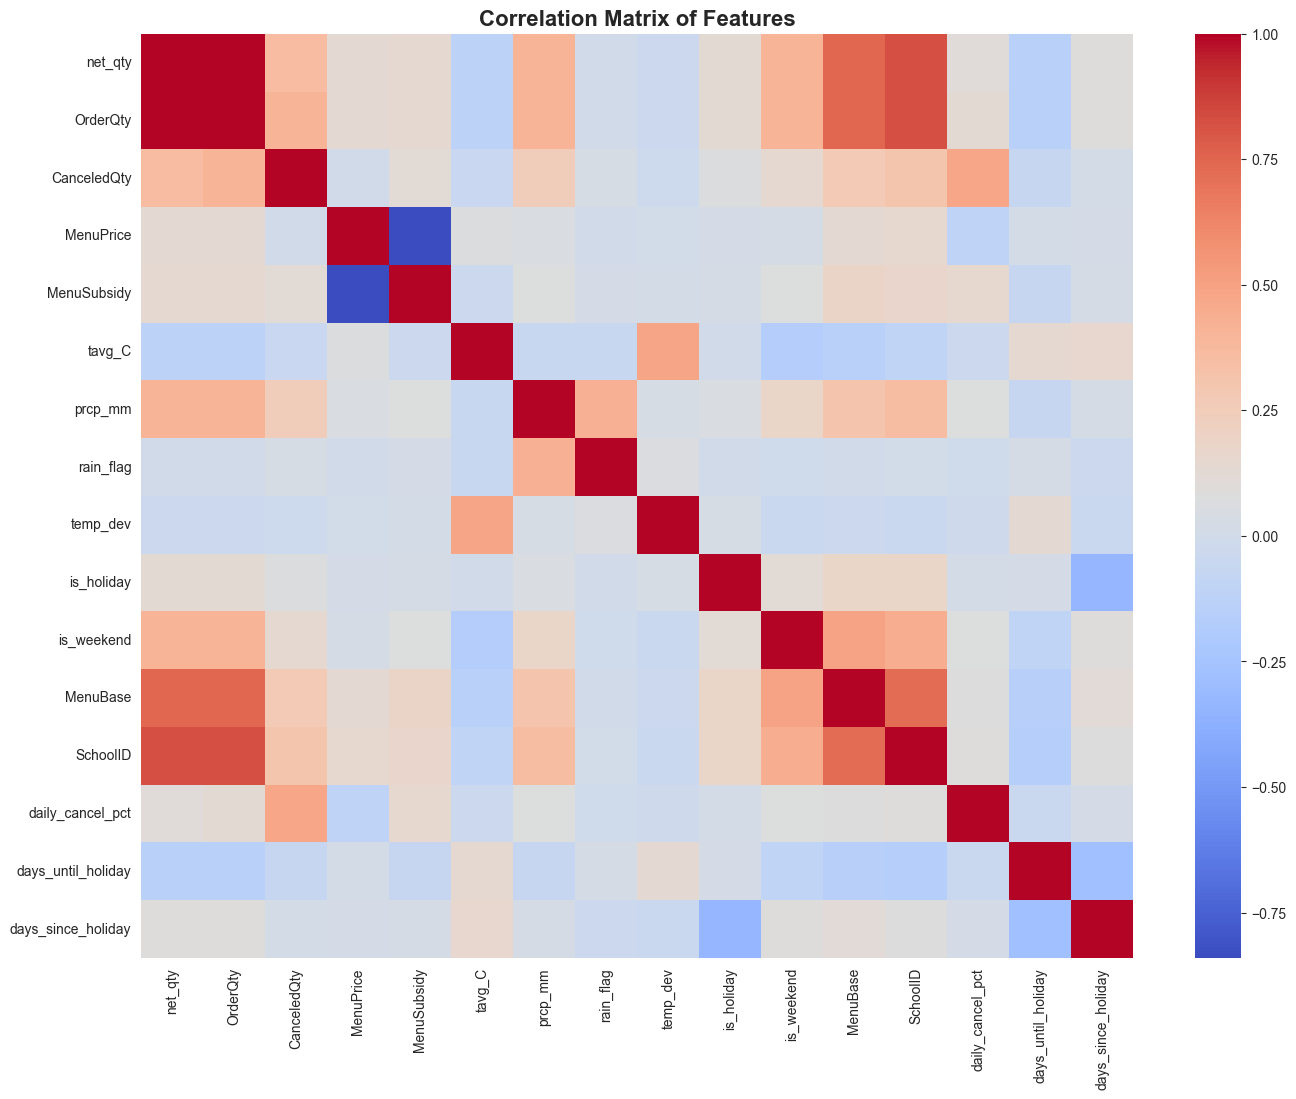


--- 3. SHAP Value Analysis (Global Model Explanation) ---
>>> TESTING MODE: Using a smaller sample (500) for SHAP analysis.
    --> Generating SHAP summary for Cancellation Rate Model...


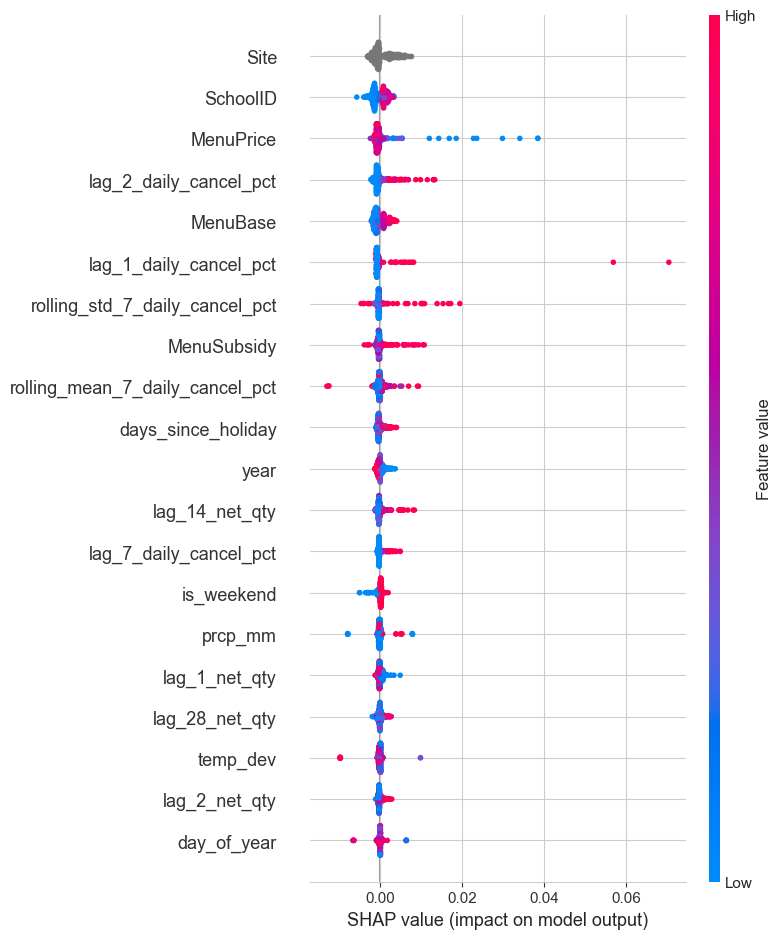

    --> Generating SHAP summary for Order Quantity Model...


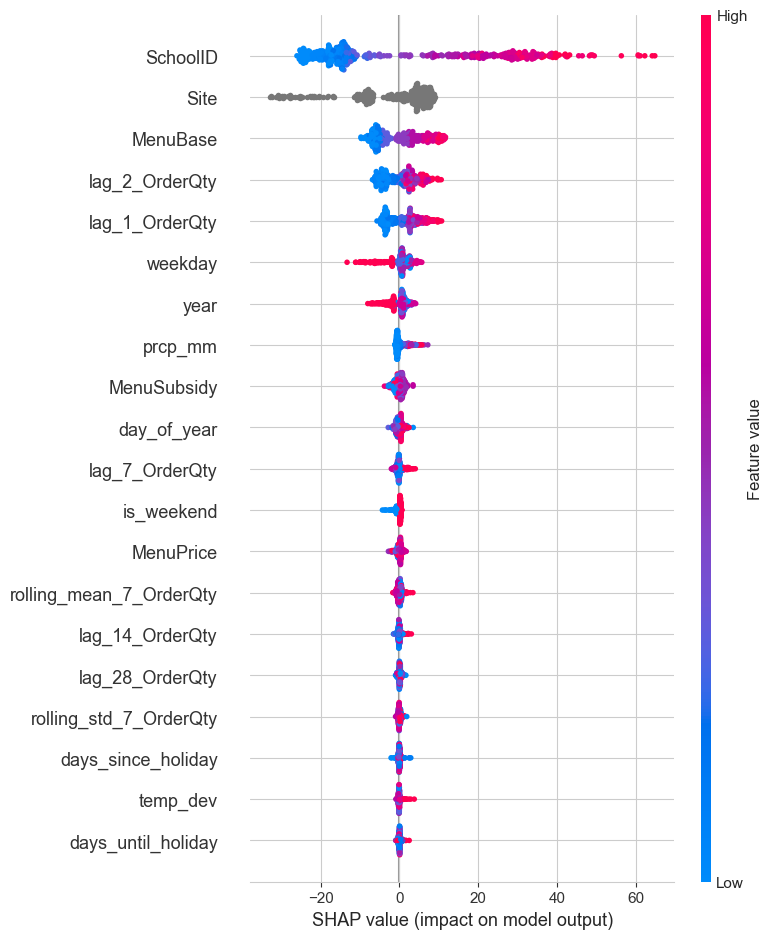


PART 9 Complete: Model diagnostics finished.


In [1]:
# =============================================================================
# PART 1: SETUP, DATA LOADING & CUSTOM TRANSFORMERS
# -----------------------------------------------------------------------------
# This section contains all necessary imports and loads the initial dataset.
# It defines the powerful, custom scikit-learn transformers used throughout.
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from lightgbm import LGBMRegressor
import warnings
import time
import shap # Import SHAP for model explainability
import holidays # (NEW) Import holidays library for accurate holiday dates

# --- Setup ---
# Suppress warnings for a cleaner output
warnings.filterwarnings('ignore')
# Set a consistent plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (18, 8)
# Set a random seed for reproducibility
RANDOM_STATE = 42

# --- (OPTIMIZED) Testing Flag ---
# Set to True for a fast run with a data sample and fewer tuning iterations.
# Set to False for a full run on all data.
TESTING_MODE = True

# --- Data Loading ---
print("PART 1: Loading and preparing data...")
try:
    # IMPORTANT: Update this path to your local file location
    df = pd.read_csv('/Users/shayan/Desktop/IDS2/Stattkueche/df_weather2.csv', parse_dates=['DateOfService', 'DateOfOrder', 'DateOfCancel'])
    print("Successfully loaded df_weather2.csv.")
except FileNotFoundError:
    print("FATAL ERROR: df_weather2.csv not found. Please update the file path.")
    # In a real script, you might exit or raise an error.
    # For this example, we'll create a dummy dataframe if the file is not found.
    print("Creating a dummy dataframe for demonstration purposes.")
    dates = pd.to_datetime(pd.date_range(start='2022-01-01', end='2023-12-31', freq='D'))
    sites = ['siteMS', 'LP', 'BK']
    dummy_data = []
    for site in sites:
        for date in dates:
            order_qty = np.random.randint(50, 200)
            cancel_qty = int(order_qty * np.random.uniform(0.01, 0.15))
            dummy_data.append({
                'DateOfService': date, 'DateOfOrder': date - pd.Timedelta(days=1), 'DateOfCancel': date,
                'Site': site, 'MenuBase': f'Menu_{np.random.randint(1,5)}',
                'OrderQty': order_qty, 'CanceledQty': cancel_qty,
                'MenuPrice': np.random.uniform(3.5, 5.5), 'MenuSubsidy': np.random.uniform(0.5, 1.5),
                'tavg_C': np.random.uniform(5, 25), 'prcp_mm': np.random.uniform(0, 10),
                'rain_flag': int(np.random.rand() > 0.7), 'temp_dev': np.random.uniform(-5, 5),
                'is_holiday': int(np.random.rand() > 0.95), 'is_weekend': int(date.weekday() >= 5),
                'SchoolID': f'School_{np.random.randint(1,4)}'
            })
    df = pd.DataFrame(dummy_data)


# --- (OPTIMIZED) Data Subsampling for Testing Phase ---
if TESTING_MODE:
    sample_size = min(100000, len(df))
    print(f"\n>>> TESTING MODE ENABLED: Sampling {sample_size} records from the original {len(df)}.")
    df = df.sample(n=sample_size, random_state=RANDOM_STATE)
    print(f"New DataFrame shape for testing: {df.shape}")

# --- Initial Feature Creation ---
# This is the target variable for the final regression model.
df['net_qty'] = df['OrderQty'] - df['CanceledQty']
print("Initial DataFrame shape:", df.shape)


# --- Custom Transformer Definitions ---
# We define all custom classes here to be used later in the pipeline.

class MissingFlagImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='median'):
        self.strategy = strategy
    def fit(self, X, y=None):
        self.num_cols = X.select_dtypes(include=np.number).columns
        self.cols_to_flag_ = [c for c in self.num_cols if X[c].isnull().any()]
        self.imputer_ = SimpleImputer(strategy=self.strategy)
        self.imputer_.fit(X[self.num_cols])
        return self
    def transform(self, X):
        X_copy = X.copy()
        for c in self.cols_to_flag_:
            X_copy[c + '_missing'] = X_copy[c].isnull().astype(int)
        # Ensure all columns learned during fit are present
        for c in self.imputer_.feature_names_in_:
             if c not in X_copy.columns:
                 X_copy[c] = 0 # Or some other default
        X_copy[self.num_cols] = self.imputer_.transform(X_copy[self.num_cols])
        return X_copy

class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, cols_to_drop):
        self.cols_to_drop = cols_to_drop
    def fit(self, X, y=None): return self
    def transform(self, X):
        return X.drop(columns=self.cols_to_drop, errors='ignore')

print("\nPART 1 Complete: All necessary libraries and custom classes are defined.")


# =============================================================================
# PART 2: DAILY AGGREGATION
# -----------------------------------------------------------------------------
# This part creates the daily aggregated dataset that forms the basis for all models.
# This is the main bottleneck on large datasets.
# =============================================================================

print("\nPART 2: Aggregating data to daily level...")
start_agg_time = time.time()
# Define aggregation rules
agg_dict = {
    'net_qty': 'sum', 'OrderQty': 'sum', 'CanceledQty': 'sum', 'MenuPrice': 'mean',
    'MenuSubsidy': 'mean', 'tavg_C': 'mean', 'prcp_mm': 'sum', 'rain_flag': 'max',
    'temp_dev': 'mean', 'is_holiday': 'max', 'is_weekend': 'max', 'MenuBase': 'nunique',
    'SchoolID': 'nunique'
}

# Perform aggregation and create the daily cancellation percentage
df_daily = df.groupby(['DateOfService', 'Site']).agg(agg_dict).reset_index()
df_daily['daily_cancel_pct'] = (df_daily['CanceledQty'] / df_daily['OrderQty']).fillna(0)
df_daily = df_daily.sort_values('DateOfService').set_index('DateOfService')
end_agg_time = time.time()
print(f"Daily aggregation finished in {end_agg_time - start_agg_time:.2f} seconds.")
print("Daily aggregated DataFrame shape:", df_daily.shape)
print("\nPART 2 Complete: Daily data is ready.")


# =============================================================================
# PART 3: FEATURE ENGINEERING PIPELINES
# -----------------------------------------------------------------------------
# This part defines the feature engineering pipelines.
# =============================================================================

print("\nPART 3: Defining feature engineering pipelines...")

class DailyFeatureEngineer(BaseEstimator, TransformerMixin):
    """Creates time-based features and lags/rolling stats for a specified target."""
    def __init__(self, target_col='net_qty'):
        self.target_col = target_col
    def fit(self, X, y=None): return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['day_of_year'] = X_copy.index.dayofyear
        X_copy['weekday'] = X_copy.index.weekday
        X_copy['month'] = X_copy.index.month
        X_copy['year'] = X_copy.index.year
        X_copy['week_of_year'] = X_copy.index.isocalendar().week.astype(int)
        X_copy['quarter'] = X_copy.index.quarter
        for lag in [1, 2, 7, 14, 28]:
            X_copy[f'lag_{lag}_{self.target_col}'] = X_copy.groupby('Site')[self.target_col].shift(lag)
        X_copy[f'rolling_mean_7_{self.target_col}'] = X_copy.groupby('Site')[self.target_col].shift(1).rolling(window=7, min_periods=1).mean()
        X_copy[f'rolling_std_7_{self.target_col}'] = X_copy.groupby('Site')[self.target_col].shift(1).rolling(window=7, min_periods=1).std()
        return X_copy

class CancellationRateFeatureEngineer(BaseEstimator, TransformerMixin):
    """Creates lag and rolling window features specifically for the cancellation rate."""
    def fit(self, X, y=None): return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        target_col = 'daily_cancel_pct'
        for lag in [1, 2, 7, 14]:
            X_copy[f'lag_{lag}_{target_col}'] = X_copy.groupby('Site')[target_col].shift(lag)
        X_copy[f'rolling_mean_7_{target_col}'] = X_copy.groupby('Site')[target_col].shift(1).rolling(window=7, min_periods=1).mean()
        X_copy[f'rolling_std_7_{target_col}'] = X_copy.groupby('Site')[target_col].shift(1).rolling(window=7, min_periods=1).std()
        return X_copy

print("\nPART 3 Complete: Feature engineering pipelines are ready.")


# =============================================================================
# PART 4: CUSTOM METRIC AND HYPERPARAMETER DEFINITIONS
# -----------------------------------------------------------------------------
# The parameter grid is comprehensive to allow for a thorough search.
# =============================================================================

print("\nPART 4: Defining custom metric and hyperparameter grids...")

def asymmetric_loss(y_true, y_pred, under_penalty=1.2):
    """Penalizes under-prediction more heavily."""
    error = y_true - y_pred
    loss = np.mean(np.where(error < 0, -error * under_penalty, error))
    return loss

asymmetric_scorer = make_scorer(asymmetric_loss, greater_is_better=False)

# (OPTIMIZED) Define different parameter grids for testing vs. full run
if TESTING_MODE:
    print(">>> TESTING MODE: Using a smaller hyperparameter grid and fewer iterations.")
    param_dist_lgbm = {
        'regressor__n_estimators': [50, 100],
        'regressor__learning_rate': [0.05, 0.1],
        'regressor__num_leaves': [20, 31],
        'regressor__colsample_bytree': [0.8],
    }
    N_ITER_RATE = 4  # Reduced iterations for rate model
    N_ITER_OQ = 5    # Reduced iterations for order quantity model
else:
    # This is the original, comprehensive grid for the full run
    param_dist_lgbm = {
        'regressor__n_estimators': [200, 400, 600, 800],
        'regressor__learning_rate': [0.02, 0.05, 0.1],
        'regressor__num_leaves': [31, 40, 50, 60],
        'regressor__max_depth': [-1, 10, 15],
        'regressor__reg_alpha': [0, 0.1, 0.5, 1],
        'regressor__reg_lambda': [0, 0.1, 0.5, 1],
        'regressor__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
        'regressor__subsample': [0.7, 0.8, 0.9, 1.0]
    }
    N_ITER_RATE = 10
    N_ITER_OQ = 15

print("\nPART 4 Complete: Custom metric and parameter grids are defined.")


# =============================================================================
# PART 5: ADVANCED CALENDAR & FINAL DATAFRAME PREP (OPTIMIZED)
# -----------------------------------------------------------------------------
# (OPTIMIZED) This section now uses a much faster, vectorized approach
# (pd.merge_asof) to calculate holiday features, avoiding slow .apply() loops.
# =============================================================================

print("\nPART 5: Creating advanced calendar features (Optimized Method)...")

df_final = df_daily.copy()

try:
    years = df_final.index.year.unique()
    de_holidays = holidays.DE(subdiv='NW', years=years)
    holidays_df = pd.DataFrame(list(de_holidays.items()), columns=['DateOfService', 'HolidayName'])
    holidays_df['DateOfService'] = pd.to_datetime(holidays_df['DateOfService'])
    holidays_df = holidays_df.sort_values('DateOfService')
    print(f"Successfully loaded {len(holidays_df)} holidays for NRW, Germany.")

    # Reset index to use 'DateOfService' for merging
    df_final_sorted = df_final.reset_index().sort_values('DateOfService')

    # Find next holiday (forward merge)
    merged_forward = pd.merge_asof(
        df_final_sorted,
        holidays_df[['DateOfService']].rename(columns={'DateOfService': 'NextHoliday'}),
        left_on='DateOfService',
        right_on='NextHoliday',
        direction='forward'
    )
    # Find previous holiday (backward merge)
    merged_backward = pd.merge_asof(
        df_final_sorted,
        holidays_df[['DateOfService']].rename(columns={'DateOfService': 'PreviousHoliday'}),
        left_on='DateOfService',
        right_on='PreviousHoliday',
        direction='backward'
    )

    # Calculate days from merged dates
    df_final_sorted['days_until_holiday'] = (merged_forward['NextHoliday'] - merged_forward['DateOfService']).dt.days
    df_final_sorted['days_since_holiday'] = (merged_backward['DateOfService'] - merged_backward['PreviousHoliday']).dt.days

    # Set index back to DateOfService and fill NaNs that may result from no past/future holidays
    df_final = df_final_sorted.set_index('DateOfService').fillna({'days_until_holiday': 0, 'days_since_holiday': 0})

except Exception as e:
    print(f"Could not load holidays or process features, falling back. Error: {e}")
    df_final['days_until_holiday'] = 0
    df_final['days_since_holiday'] = 0


# Convert 'Site' to a category type for LightGBM to handle efficiently
df_final['Site'] = df_final['Site'].astype('category')

print("Advanced calendar features created.")
print("\nPART 5 Complete: Final modeling dataframe is ready.")


# =============================================================================
# PART 6: GLOBAL MODEL - STAGE 1 (Cancellation Rate Prediction)
# -----------------------------------------------------------------------------
# We train a SINGLE GLOBAL model on all data, using 'Site' as a
# categorical feature. This is much faster than looping.
# =============================================================================

print("\nPART 6: Training GLOBAL Stage 1 model to predict cancellation rate...")
start_time = time.time()

# Define the pipeline. Note that 'Site' is NOT dropped.
rate_features_to_exclude = ['net_qty', 'OrderQty', 'CanceledQty', 'daily_cancel_pct']
rate_pipeline = Pipeline([
    ('daily_features', DailyFeatureEngineer(target_col='net_qty')),
    ('cancel_rate_features', CancellationRateFeatureEngineer()),
    ('imputer', MissingFlagImputer(strategy='median')),
    ('dropper', ColumnDropper(cols_to_drop=rate_features_to_exclude)),
    ('regressor', LGBMRegressor(random_state=RANDOM_STATE, n_jobs=-1))
])

X_rate_full, y_rate_full = df_final, df_final['daily_cancel_pct']

# We still use TimeSeriesSplit for robust validation
tscv = TimeSeriesSplit(n_splits=5)

search_rate = RandomizedSearchCV(
    estimator=rate_pipeline,
    param_distributions=param_dist_lgbm,
    n_iter=N_ITER_RATE, # (OPTIMIZED) Use variable number of iterations
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1 # Show progress
)
search_rate.fit(X_rate_full, y_rate_full)
global_cancellation_model = search_rate.best_estimator_

end_time = time.time()
print(f"Global cancellation model tuned in {end_time - start_time:.2f} seconds. Best RMSE: {-search_rate.best_score_:.4f}")
print("\nPART 6 Complete: Global cancellation rate model is trained.")


# =============================================================================
# PART 7: GLOBAL MODEL - STAGE 2 (Order Quantity Prediction)
# -----------------------------------------------------------------------------
# We train a SINGLE GLOBAL model for order quantity.
# =============================================================================

print("\nPART 7: Training GLOBAL Stage 2 model to predict order quantity...")
start_time = time.time()

order_qty_features_to_exclude = ['net_qty', 'OrderQty', 'CanceledQty', 'daily_cancel_pct']
order_qty_pipeline = Pipeline([
    ('daily_features', DailyFeatureEngineer(target_col='OrderQty')),
    ('imputer', MissingFlagImputer(strategy='median')),
    ('dropper', ColumnDropper(cols_to_drop=order_qty_features_to_exclude)),
    ('regressor', LGBMRegressor(random_state=RANDOM_STATE, n_jobs=-1))
])

X_oq_full, y_oq_full = df_final, df_final['OrderQty']

search_oq = RandomizedSearchCV(
    estimator=order_qty_pipeline,
    param_distributions=param_dist_lgbm,
    n_iter=N_ITER_OQ, # (OPTIMIZED) Use variable number of iterations
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1
)
search_oq.fit(X_oq_full, y_oq_full)
global_order_quantity_model = search_oq.best_estimator_

end_time = time.time()
print(f"Global order quantity model tuned in {end_time - start_time:.2f} seconds. Best RMSE: {-search_oq.best_score_:.4f}")
print("\nPART 7 Complete: Global order quantity model is trained.")


# =============================================================================
# PART 8: FINAL EVALUATION & IN-DEPTH ANALYSIS
# -----------------------------------------------------------------------------
# This part now loops through sites ONLY for evaluation, using the
# pre-trained global models to make predictions.
# =============================================================================

print("\nPART 8: Evaluating global models and performing final analysis...")

final_two_stage_scores = {}
sites = df_final['Site'].cat.categories

for site in sites:
    print(f"\n{'='*30} Final Evaluation for Site: {site} {'='*30}")

    df_site_final = df_final[df_final['Site'] == site].copy()
    if len(df_site_final) < 100:
        print(f"    Skipping site {site} due to insufficient data.")
        continue

    tscv = TimeSeriesSplit(n_splits=5)
    y_trues, y_preds = [], []

    for train_idx, test_idx in tscv.split(df_site_final):
        # We don't need to re-train the global model.
        # We just use it to predict on the test set for this site.
        test_data = df_site_final.iloc[test_idx]

        # Stage 1: Predict Cancellation Rate
        predicted_cancel_pct = np.clip(global_cancellation_model.predict(test_data), 0, 1)

        # Stage 2: Predict Order Quantity
        predicted_order_qty = global_order_quantity_model.predict(test_data)

        # Combine Predictions
        final_predictions = predicted_order_qty * (1 - predicted_cancel_pct)

        y_trues.append(test_data['net_qty'])
        y_preds.append(pd.Series(final_predictions, index=test_data.index))

    if not y_trues: continue # Skip if no evaluation folds were run

    y_true_all, y_pred_all = pd.concat(y_trues), pd.concat(y_preds)

    final_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
    final_asymmetric_loss = asymmetric_loss(y_true_all, y_pred_all)
    final_two_stage_scores[site] = {'Asymmetric Loss': final_asymmetric_loss, 'RMSE': final_rmse}

    print(f"\n--> Prediction Performance for Site: {site}")
    print(f"    Final RMSE: {final_rmse:.4f}")
    print(f"    Final Asymmetric Loss: {final_asymmetric_loss:.4f}")

    errors = y_true_all - y_pred_all

    plt.figure(figsize=(18, 6))
    errors.plot(style='.', alpha=0.6, label='Error')
    plt.axhline(0, color='red', linestyle='--', lw=2, label='Zero Error')
    plt.title(f'Prediction Errors (Actual - Predicted) Over Time for Site: {site}', fontsize=16, weight='bold')
    plt.ylabel('Error in Net Quantity')
    plt.legend()
    plt.show()

# --- Final Summary Table ---
print(f"\n\n{'='*30} OVERALL PERFORMANCE SUMMARY {'='*30}")
final_model_df = pd.DataFrame(final_two_stage_scores).T.rename(columns=lambda c: f"Final Two-Stage LGBM {c}")
print("Final Model Performance Across All Sites:")
try:
    from IPython.display import display
    display(final_model_df)
except ImportError:
    print(final_model_df)

print("\nSCRIPT COMPLETE: Final global two-stage model has been evaluated and analyzed.")


# =============================================================================
# PART 9: (NEW) MODEL DIAGNOSTICS AND DEEPER ANALYSIS
# -----------------------------------------------------------------------------
# This new section provides deeper insights into the model's behavior by
# analyzing feature importances, correlations, and SHAP values.
# =============================================================================

print("\n\n" + "="*30 + " PART 9: MODEL DIAGNOSTICS " + "="*30)

# --- 1. Feature Importance Analysis ---
print("\n--- 1. Feature Importance Analysis ---")

def plot_feature_importance(model, feature_names, title):
    """Plots the top 20 most important features from a trained model."""
    df_importance = pd.DataFrame({'feature': feature_names, 'importance': model.feature_importances_})
    df_importance = df_importance.sort_values('importance', ascending=False).head(20)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=df_importance, palette='viridis')
    plt.title(title, fontsize=16, weight='bold')
    plt.tight_layout()
    plt.show()

# Get feature names after all transformations for the cancellation model
# We apply all steps of the pipeline except the final regressor
trans_pipe_rate = Pipeline(global_cancellation_model.steps[:-1])
feature_names_rate = trans_pipe_rate.fit_transform(X_rate_full).columns
plot_feature_importance(global_cancellation_model.named_steps['regressor'], feature_names_rate, 'Top 20 Features for Cancellation Rate Model')

# Get feature names after all transformations for the order quantity model
trans_pipe_oq = Pipeline(global_order_quantity_model.steps[:-1])
feature_names_oq = trans_pipe_oq.fit_transform(X_oq_full).columns
plot_feature_importance(global_order_quantity_model.named_steps['regressor'], feature_names_oq, 'Top 20 Features for Order Quantity Model')


# --- 2. Correlation Matrix Heatmap ---
print("\n--- 2. Correlation Matrix of Numerical Features ---")
plt.figure(figsize=(16, 12))
# Select only numeric columns for correlation calculation
numeric_cols = df_final.select_dtypes(include=np.number)
corr = numeric_cols.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False) # Annotations are off to avoid clutter
plt.title('Correlation Matrix of Features', fontsize=16, weight='bold')
plt.show()


# --- 3. SHAP (SHapley Additive exPlanations) Analysis ---
# NOTE: This can be computationally intensive.
print("\n--- 3. SHAP Value Analysis (Global Model Explanation) ---")

# (OPTIMIZED) Adjust sample size for SHAP based on testing mode
if TESTING_MODE:
    print(">>> TESTING MODE: Using a smaller sample (500) for SHAP analysis.")
    SHAP_SAMPLE_SIZE = 500
else:
    SHAP_SAMPLE_SIZE = 2000

# Explain the Cancellation Rate model
print("    --> Generating SHAP summary for Cancellation Rate Model...")
explainer_rate = shap.TreeExplainer(global_cancellation_model.named_steps['regressor'])
X_rate_transformed = trans_pipe_rate.transform(X_rate_full)
# Sample data for performance
shap_sample_data_rate = X_rate_transformed.sample(n=min(SHAP_SAMPLE_SIZE, len(X_rate_transformed)), random_state=RANDOM_STATE)
shap_values_rate = explainer_rate.shap_values(shap_sample_data_rate)
shap.summary_plot(shap_values_rate, shap_sample_data_rate, plot_type="dot")

# Explain the Order Quantity model
print("    --> Generating SHAP summary for Order Quantity Model...")
explainer_oq = shap.TreeExplainer(global_order_quantity_model.named_steps['regressor'])
X_oq_transformed = trans_pipe_oq.transform(X_oq_full)
# Sample data for performance
shap_sample_data_oq = X_oq_transformed.sample(n=min(SHAP_SAMPLE_SIZE, len(X_oq_transformed)), random_state=RANDOM_STATE)
shap_values_oq = explainer_oq.shap_values(shap_sample_data_oq)
shap.summary_plot(shap_values_oq, shap_sample_data_oq, plot_type="dot")

print("\nPART 9 Complete: Model diagnostics finished.")